In [57]:
#Imports
#Classificação 

import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt 
from matplotlib import pyplot as plt

Classificação
Os 8 passos para treinar o KNN
 Passo 01: Carregue os dados
 Passo 02: Defina o número K vizinhos mais próximos.
 Passo 03: Para cada exemplo sem rótulo:
 Passo 04: Calcule a distância entre o ponto sem rótulo e todos os outros pontos rotulados do conjunto de dados.
 Passo 05: Encontre o K pontos mais próximos.
 Passo 06: Identifique os rótulos de cada um dos K vizinhos mais próximos.
 Passo 07: Calcule a “moda” dos K vizinhos mais próximos.
 Passo 08: Classifique o ponto sem rótulo com a moda de seus k vizinhos mais próximos.

LOAD DATA

In [48]:
#Load dataset Classificação

# Training
x_trainning_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_training.csv')
y_trainning_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_training.csv')

# Validation
x_validation_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_validation.csv')
y_validation_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_validation.csv')

# Test
x_test_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\X_test.csv')
y_test_data = pd.read_csv(r'C:\Users\Leticia Furletti\Repos\DATA_SCIENCE\Comunidade_Ds\MACHINE LEARNING\9-Projeto_do_aluno\ensaio_classificacao\y_test.csv')




In [44]:
#File analysis
x_trainning_data.columns

Index(['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel'],
      dtype='object')

In [45]:
x_trainning_data.head(5)

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,...,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,...,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


In [49]:
#Features selection
#Coisas similares estão próximas uma das outras, portanto, todas as suas características precisam ser númericas. (discard the ID and all binary features)

#selected features 
#features = ['age', 'class', 'flight_distance', 'inflight_wifi_service',
#            'departure_arrival_time_convenient', 'ease_of_online_booking',
#           'gate_location', 'food_and_drink', 'online_boarding', 
#            'seat_comfort', 'inflight_entertainment',
#            'on_board_service', 'leg_room_service', 
#           'departure_delay_in_minutes', 'arrival_delay_in_minutes']


features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']


#x_trainning = x_trainning_data.loc[:,features]
#x_test = x_test_data.loc[:,features]
#x_validation = x_trainning_data.loc[:,features]

y_trainning = y_trainning_data.iloc[:, 0]
y_test   = y_test_data.iloc[:, 0]
y_validation  = y_validation_data.iloc[:, 0]



Classification - trainning

In [50]:

knn_classifier = KNeighborsClassifier() # não vou definir um valor de K especifico, então por padrão ele considera 5 quando n defino 
knn_classifier.fit( x_trainning_data, y_trainning )
y_pred = knn_classifier.predict(x_trainning_data)



In [51]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix = mt.confusion_matrix( y_trainning, y_pred ) 
print(f"confusion matrix is:")
print(confusion_matrix)

#accuracy
accuracy = mt.accuracy_score(y_trainning,y_pred)
print(f"accuracy is: {accuracy}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision= mt.precision_score( y_trainning, y_pred) 
print(f"precision is: {precision}")

#Recall
recall= mt.recall_score( y_trainning, y_pred) 
print(f"recall is: {recall}")

#F1_Score (um unico número que representa precision e recall)
f1_score = mt.f1_score(y_trainning,y_pred)
print(f"f1_score is: {f1_score}")

confusion matrix is:
[[33652  7435]
 [ 8405 23023]]
accuracy is: 0.7815624353582018
precision is: 0.7558933613500558
recall is: 0.7325633193330788
f1_score is: 0.744045503021685


Classification - Validation

In [52]:
knn_classifier = KNeighborsClassifier() # não vou definir um valor de K especifico, então por padrão ele considera 5 quando n defino 
knn_classifier.fit( x_trainning_data, y_trainning ) #.fit é aplicado sobre os dados de treino
y_pred_validation = knn_classifier.predict(x_validation_data)



In [53]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix_val = mt.confusion_matrix( y_validation, y_pred_validation ) 
print(f"confusion matrix is:")
print(confusion_matrix_val)

#accuracy
accuracy_val = mt.accuracy_score(y_validation,y_pred_validation)
print(f"accuracy is: {accuracy_val}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision_val= mt.precision_score( y_validation, y_pred_validation) 
print(f"precision is: {precision_val}")

#Recall
recall_val= mt.recall_score( y_validation, y_pred_validation) 
print(f"recall is: {recall_val}")

#F1_Score (um unico número que representa precision e recall)
f1_score_val = mt.f1_score(y_validation,y_pred_validation)
print(f"f1_score is: {f1_score_val}")

confusion matrix is:
[[12875  4735]
 [ 5345  8124]]
accuracy is: 0.6756652401943435
precision is: 0.631775410218524
recall is: 0.6031628183235578
f1_score is: 0.617137648131267


Hypperparameters Fine Tunnig

Ocorre antes de ir para os dados de teste, e é feito utilizando os dados de validação

In [76]:
#Código variando valores de K até obter oque proporcione os melhores resultados 



k_values=  [k for k in range( 3, 10 )]  #coloco o conjunto de numero que quero testar k_values = [1,5,4,6,8] 
best_k = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
f1_list = list()
accuracy_list = list()
precision_list = list()
recall_list = list()

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit( x_trainning_data, y_trainning )
    y_pred_fine_tunning = knn_classifier.predict(x_validation_data)
    # Criar uma cópia do conjunto de dados original
    df_result = x_validation_data.copy()

    # Acrescentar a coluna "Classification" com valores inicializados como zero
    df_result['Classification'] = 0
    #Performance's analysis
    # Confusion Matrix 
    confusion_matrix = mt.confusion_matrix( y_validation, y_pred_fine_tunning ) 

    #accuracy
    accuracy = mt.accuracy_score(y_validation, y_pred_fine_tunning)


    #Precisão é o número de acertos a cada tentativa
    #Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
    #precision
    precision= mt.precision_score( y_validation, y_pred_fine_tunning) 

    #Recall
    recall= mt.recall_score( y_validation, y_pred_fine_tunning) 

    #F1_Score (um unico número que representa precision e recall)
    f1_score = mt.f1_score(y_validation, y_pred_fine_tunning)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

    if recall > best_Recall:
        best_Recall = recall

    if precision > best_Precision:
        best_Precision = precision

    if f1_score > best_F1:
        best_F1 = f1_score
        best_k= k
        knn_BestClassifier = knn_classifier
# Show best result:
print(f"BEST K: {best_k}")


BEST K: 3


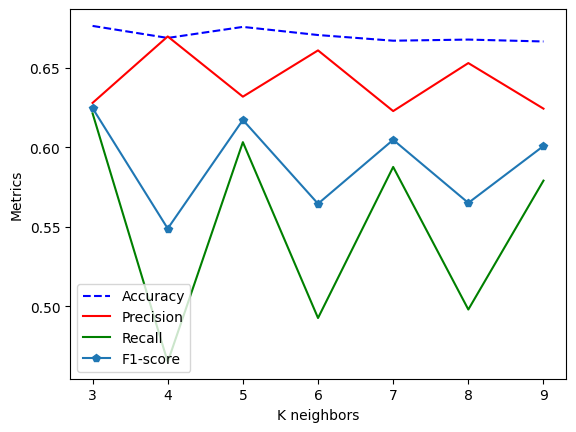

In [77]:
# Plot results
plt.plot( k_values, accuracy_list,  'b--', label='Accuracy')
plt.plot( k_values, precision_list,  'r-', label='Precision')
plt.plot( k_values, recall_list,  'g-', label='Recall')
plt.plot( k_values, f1_list,  'p-', label='F1-score')
plt.xlabel( 'K neighbors' )
plt.ylabel( 'Metrics' )
plt.legend()
#plt.hlines( 0.95, 0, 1, color='b', linestyle='--' )
#plt.hlines( 0.68, 0, 1, color='g', linestyle='--' )

Classification - Test

Usando agora o melhor parametro

In [81]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(x_trainning_data, y_trainning)#.fit é aplicado sobre os dados de treino
y_pred_test = knn_classifier.predict(x_test_data)

In [82]:
#Performance's analysis
# Confusion Matrix 
confusion_matrix_val = mt.confusion_matrix( y_test, y_pred_test ) 
print(f"confusion matrix is:")
print(confusion_matrix_val)

#accuracy
accuracy_val = mt.accuracy_score(y_test, y_pred_test)
print(f"accuracy is: {accuracy_val}")

#Precisão é o número de acertos a cada tentativa
#Recall é de todas as possibilidades de acerto, quantas você conseguiu acertar
#precision
precision_val= mt.precision_score( y_test, y_pred_test) 
print(f"precision is: {precision_val}")

#Recall
recall_val= mt.recall_score( y_test, y_pred_test) 
print(f"recall is: {recall_val}")

#F1_Score (um unico número que representa precision e recall)
f1_score_val = mt.f1_score(y_test, y_pred_test)
print(f"f1_score is: {f1_score_val}")

confusion matrix is:
[[10452  4076]
 [ 4411  6954]]
accuracy is: 0.6722280152937087
precision is: 0.6304623753399818
recall is: 0.6118785745710514
f1_score is: 0.6210314802411251
